[Pandas 0.16.0](http://pandas.pydata.org/pandas-docs/dev/whatsnew.html#v0-16-0-march-22-2015) was released this week. Version 0.16.0 includes a new `.assign()` method of DataFrames, which I'll use on some real world automobile MPG data below ([data file](/data/prius_gas.csv)).

In [1]:
%matplotlib inline
import pandas as pd
print pd.__version__
pd.options.display.mpl_style = 'default'

0.16.0


In [2]:
mpg_df = pd.read_csv('data/prius_gas.csv', na_values=['NA', 'DNF'])
mpg_df.head(3)

,Date,Brand,City,State,$/Gal,Odometer,Gallons,Miles,MPG
0,2/22/2013,Texaco,Mariposa,CA,4.259,245,6.230,NaN,NaN
1,2/24/2013,Chevron,Berkeley,CA,4.159,707,8.452,412,48.75
2,3/8/2013,Chevron,Tahoe City,CA,4.499,1028,8.137,321,39.45


The new `.assign()` allows for more concise code in cases of "I want to plot a computed quantity." Here I plot how many miles were remaining in each fillup, assuming the MPG held steady at the average for that tank.

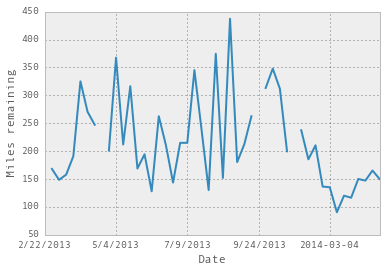

In [3]:
tank_capacity = 11.9
ax = (mpg_df.assign(miles_remaining=lambda x: (tank_capacity - x['Gallons']) * x['MPG'])
            .plot(x='Date', y='miles_remaining', lw='2', legend=None))
ax.set_ylabel('Miles remaining');